In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'Nanum Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [27]:
file_path = '/Users/leejeje/Desktop/2024 겨울학기/Data Science Lab/EDA Project/Code/0101.고등교육학교개황(09-22)(100%).csv'
data_school = pd.read_csv(file_path, encoding='cp949')
data_school = data_school[data_school["학교구분명"] == "대학"]
keep_values = ['대학', '산업대학', '교육대학', '기술대학(대학과정)', '기술대학(전문대학과정)']
data_school = data_school[data_school["학제유형명"].isin(keep_values)]
data_school = data_school[['조사년도', '시도명', '지역명', '학제유형명', '고등교육학교_입학생수', '6학년재적학생수', '5학년재적학생수', '4학년재적학생수','3학년재적학생수', '2학년재적학생수', '1학년재적학생수' ]]
data_school_by_year = {year: data_school[data_school["조사년도"] == year] for year in range(2009, 2023)}
int_columns = ['고등교육학교_입학생수', '6학년재적학생수', '5학년재적학생수', '4학년재적학생수','3학년재적학생수', '2학년재적학생수', '1학년재적학생수' ]
data_school = data_school[['조사년도', '시도명','고등교육학교_입학생수', '6학년재적학생수', '5학년재적학생수', '4학년재적학생수','3학년재적학생수', '2학년재적학생수', '1학년재적학생수' ]]
df = pd.DataFrame(data_school)
df_sorted = df.sort_values(by=['조사년도', '시도명']).reset_index(drop=True)
df_grouped_1 = df.groupby(['조사년도', '시도명'], as_index=False).sum()

In [28]:
file_path = '/Users/leejeje/Desktop/2024 겨울학기/Data Science Lab/EDA Project/Code/0102.대학교개황(09-22)(100%).csv'
data_college = pd.read_csv(file_path, encoding='euc-kr') 
data_college = data_college[data_college["학교구분명"] == "대학"]
keep_values = ['대학', '산업대학', '교육대학', '기술대학(대학과정)', '기술대학(전문대학과정)']
data_college = data_college[data_college["학제유형명"].isin(keep_values)]
data_college = data_college[['조사년도', '시도명', '학제유형명', '대학교개황_입학생수', '대학교개황_입학정원수', '대학교개황_재학생수', '대학교개황_재적학생수']]
data_college_by_year = {year: data_college[data_college["조사년도"] == year] for year in range(2009, 2023)}
int_columns = ['대학교개황_입학생수', '대학교개황_입학정원수', '대학교개황_재학생수', '대학교개황_재적학생수']
data_college = data_college[['조사년도', '시도명','대학교개황_입학생수', '대학교개황_입학정원수', '대학교개황_재학생수', '대학교개황_재적학생수']]
df = pd.DataFrame(data_college)
df_sorted = df.sort_values(by=['조사년도', '시도명']).reset_index(drop=True)
df_grouped_2 = df.groupby(['조사년도', '시도명'], as_index=False).sum()
output_path = '/Users/leejeje/Desktop/2024 겨울학기/Data Science Lab/EDA Project/Code/지역별2.csv'
df_grouped_2.to_csv(output_path, index=False, encoding='utf-8-sig')

In [29]:
file_path = '/Users/leejeje/Desktop/2024 겨울학기/Data Science Lab/EDA Project/Code/0103.대학교학생개황(09-22)(100%).csv'
data_student = pd.read_csv(file_path, encoding='euc-kr')
data_student = data_student[data_student["학교구분명"] == "대학"]
keep_values = ['대학', '산업대학', '교육대학', '기술대학(대학과정)', '기술대학(전문대학과정)']
data_student = data_student[data_student["학제유형명"].isin(keep_values)]
data_student = data_student[['조사년도', '시도명', '학제유형명', '대학교학생_재학생수', '대학교학생_재적학생수', '대학교학생_입학정원수', '대학교학생_입학지원자수','대학교학생_입학생수']]
data_student_by_year = {year: data_student[data_student["조사년도"] == year] for year in range(2009, 2023)}
int_columns = ['대학교학생_재학생수', '대학교학생_재적학생수', '대학교학생_입학정원수', '대학교학생_입학지원자수','대학교학생_입학생수']
data_student = data_student[['조사년도', '시도명', '대학교학생_재학생수', '대학교학생_재적학생수', '대학교학생_입학정원수', '대학교학생_입학지원자수','대학교학생_입학생수']]
df = pd.DataFrame(data_student)
df_sorted = df.sort_values(by=['조사년도', '시도명']).reset_index(drop=True)
df_grouped_3 = df.groupby(['조사년도', '시도명'], as_index=False).sum()

In [30]:
df_grouped_1['재적학생수'] = df_grouped_2['대학교개황_재적학생수']
df_grouped_1['입학정원수'] = df_grouped_2['대학교개황_입학정원수']
df_grouped_1['입학지원자수'] = df_grouped_3['대학교학생_입학지원자수']

df_final = df_grouped_1
output_path = '/Users/leejeje/Desktop/2024 겨울학기/Data Science Lab/EDA Project/Code/지역별.csv'
df_final.to_csv(output_path, index=False, encoding='utf-8-sig')

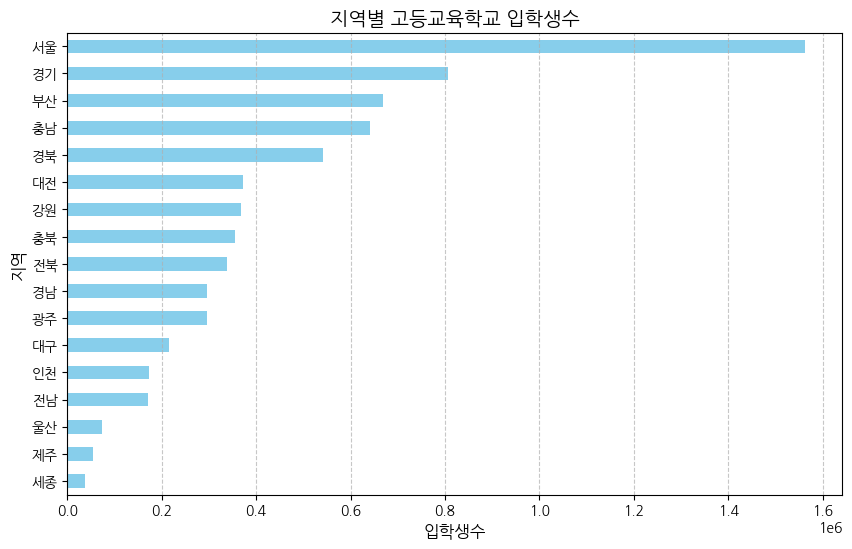

In [31]:
# 시도명별 고등교육학교 입학생수 합산
df_grouped = df_final.groupby('시도명')['고등교육학교_입학생수'].sum().sort_values()

plt.figure(figsize=(10, 6))
df_grouped.plot(kind='barh', color='skyblue')
plt.title('지역별 고등교육학교 입학생수', fontsize=14)
plt.xlabel('입학생수', fontsize=12)
plt.ylabel('지역', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

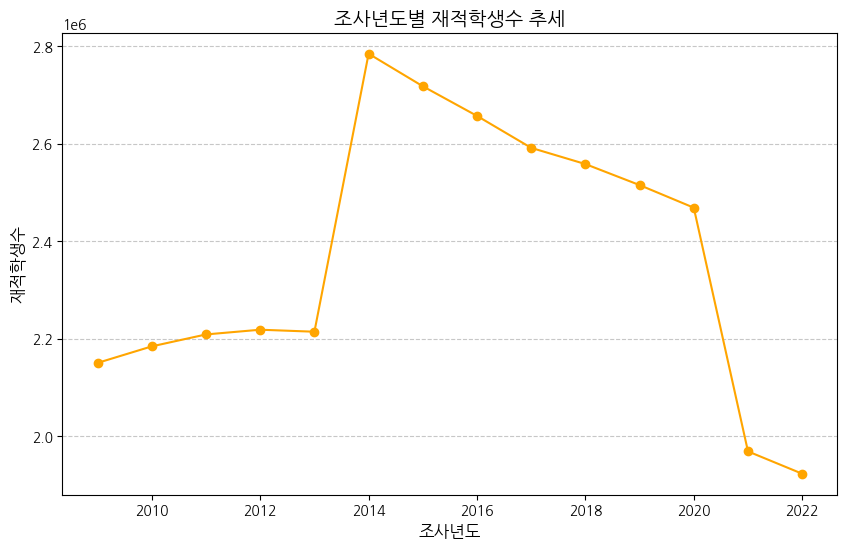

In [32]:
# 조사년도별 재적학생수 합계
df_yearly = df_final.groupby('조사년도')['재적학생수'].sum()

plt.figure(figsize=(10, 6))
df_yearly.plot(kind='line', marker='o', color='orange')
plt.title('조사년도별 재적학생수 추세', fontsize=14)
plt.xlabel('조사년도', fontsize=12)
plt.ylabel('재적학생수', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

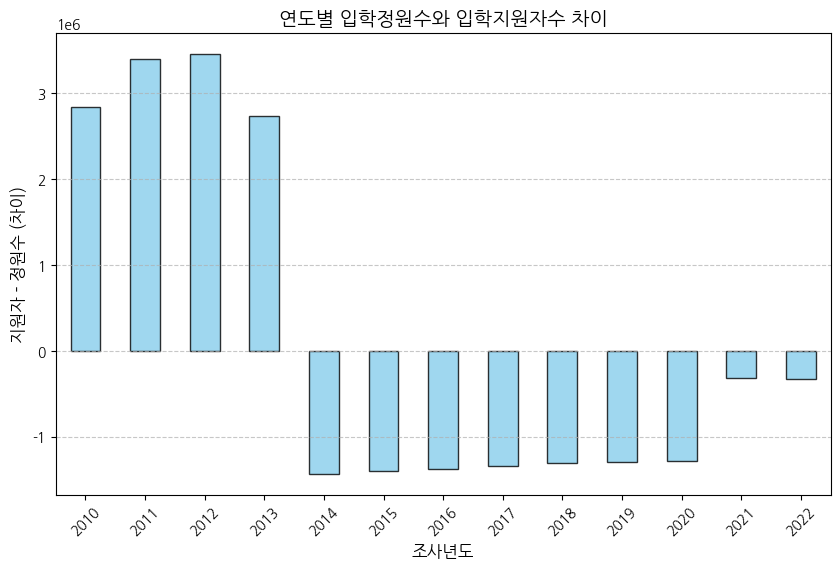

In [35]:
df_filtered = df_final[df_final['조사년도'] != 2009].copy() 

# 연도별 입학정원수와 입학지원자수 차이를 계산
df_filtered['정원_지원자_차이'] = df_filtered['입학지원자수'] - df_filtered['입학정원수']
df_yearly_difference = df_filtered.groupby('조사년도')['정원_지원자_차이'].sum()

# 시각화
plt.figure(figsize=(10, 6))
df_yearly_difference.plot(kind='bar', color='skyblue', alpha=0.8, edgecolor='black')
plt.title('연도별 입학정원수와 입학지원자수 차이', fontsize=14)
plt.xlabel('조사년도', fontsize=12)
plt.ylabel('지원자 - 정원수 (차이)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

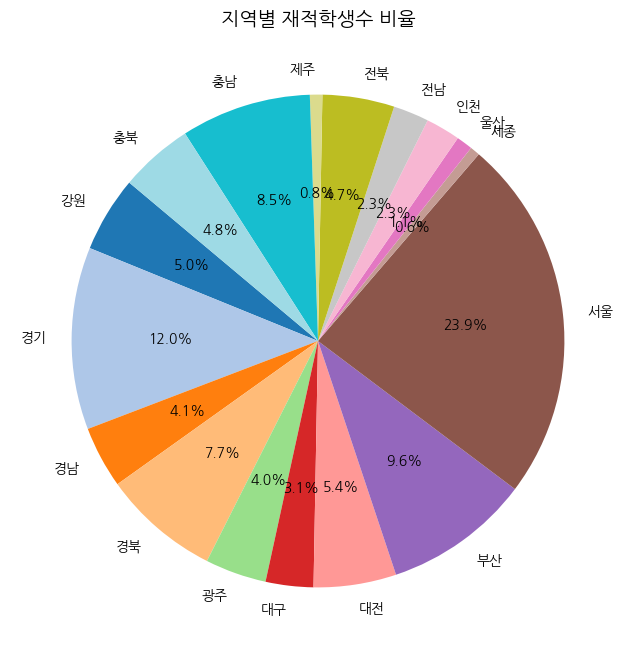

In [34]:
# 시도명별 재적학생수 비율
df_grouped_pie = df_final.groupby('시도명')['재적학생수'].sum()

plt.figure(figsize=(10, 8))
df_grouped_pie.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='tab20')
plt.title('지역별 재적학생수 비율', fontsize=14)
plt.ylabel('')
plt.show()